In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
#get data

file2019 = "399417274_T_T100_MARKET_ALL_CARRIER.csv"
file2020 = "399417274_T_T100_MARKET_ALL_CARRIER2.csv"

data2019 = pd.read_csv(file2019)
data2020 = pd.read_csv(file2020)

df_list = [data2019,data2020]

alldata = pd.concat(df_list)
alldata.columns

Index(['PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'UNIQUE_CARRIER',
       'AIRLINE_ID', 'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY', 'REGION',
       'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP', 'CARRIER_GROUP_NEW',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS',
       'DATA_SOURCE', 'Unnamed: 41'],
      dtype='object')

In [3]:
flightclass = ['A','C','E','F']

passdata = alldata.loc[(alldata['CLASS'] =='A') | (alldata['CLASS'] =='C') | (alldata['CLASS'] =='E') | (alldata['CLASS'] =='F')  ,:]

In [4]:
passdata = passdata[['UNIQUE_CARRIER_NAME', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP','PASSENGERS', 'DISTANCE', 'CLASS']]
passdata.head()

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_COUNTRY,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS
0,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,33,DAL,"Dallas, TX",...,US,United States,74,2019,2,6,3,0.0,1091.0,F
1,Southwest Airlines Co.,PHL,"Philadelphia, PA",PA,Pennsylvania,US,United States,23,GEG,"Spokane, WA",...,US,United States,93,2019,2,6,5,0.0,2155.0,F
2,Southwest Airlines Co.,PVD,"Providence, RI",RI,Rhode Island,US,United States,15,ATL,"Atlanta, GA",...,US,United States,34,2019,2,6,2,0.0,903.0,F
3,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,DEN,"Denver, CO",...,US,United States,82,2019,2,6,3,0.0,1482.0,F
4,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,LAS,"Las Vegas, NV",...,US,United States,85,2019,2,6,5,0.0,2086.0,F


In [5]:
saorigin = passdata.loc[passdata["ORIGIN"]=='SAT',:]
sadestination = passdata.loc[passdata["DEST"]=='SAT',:]

In [6]:
saorigin['YEAR'].value_counts()

2019    1422
2020     522
Name: YEAR, dtype: int64

In [7]:
saorigindestgrp = saorigin.groupby(['YEAR', 'QUARTER', 'MONTH','DEST_COUNTRY_NAME']).agg({'PASSENGERS':['count','min','max','sum','std','var'], 'DISTANCE':['count','min','max','sum','std','var']})
saorigindestgrp.head()

PASSENGERS                             \
                                          count     min      max       sum   
YEAR QUARTER MONTH DEST_COUNTRY_NAME                                         
2019 1       1     Canada                     1  1032.0   1032.0    1032.0   
                   El Salvador                1     1.0      1.0       1.0   
                   Mexico                     7    17.0   6295.0   14667.0   
                   United States            112     1.0  41168.0  345590.0   
             2     Canada                     1  1116.0   1116.0    1116.0   

                                                                DISTANCE  \
                                              std           var    count   
YEAR QUARTER MONTH DEST_COUNTRY_NAME                                       
2019 1       1     Canada                     NaN           NaN        1   
                   El Salvador                NaN           NaN        1   
                   Mexico             2001.232013  4.004930e+06        7   
                   United States      6000.561255  3.600674e+07      112   
             2     Canada                     NaN           NaN        1   

                                                                            \
                                         min     max       sum         std   
YEAR QUARTER MONTH DEST_COUNTRY_NAME                                         
2019 1       1     Canada             1425.0  1425.0    1425.0         NaN   
                   El Salvador        1261.0  1261.0    1261.0         NaN   
                   Mexico              277.0   931.0    4676.0  193.808325   
                   United States       135.0  2181.0  114515.0  408.931036   
             2     Canada             1425.0  1425.0    1425.0         NaN   

                                                     
                                                var  
YEAR QUARTER MONTH DEST_COUNTRY_NAME                 
2019 1       1     Canada                       NaN  
                   El Salvador                  NaN  
                   Mexico              37561.666667  
                   United States      167224.592584  
             2     Canada                       NaN

## Flights from San Antonio to Other Places

### Summary of all places (Not US)

Text(0, 0.5, 'Number of Passengers')

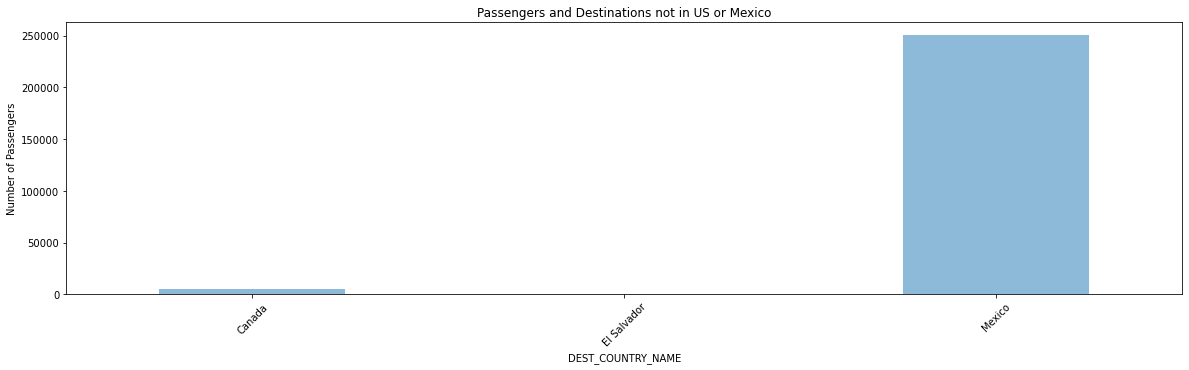

In [73]:
# bar graph of passengers to destinations not US

othercountries = saorigin.loc[(saorigin['DEST_COUNTRY_NAME']!='United States') & (saorigin['PASSENGERS']>0),:]
# othercountries = saorigin.loc[(saorigin['PASSENGERS']>0) ,:]
othercountriesgrp = othercountries.groupby('DEST_COUNTRY_NAME').agg({'PASSENGERS':'sum'})

othercountriesbar = othercountriesgrp.plot.bar(figsize=(20,5), alpha=0.5, align="center", legend=False, title="Passengers and Destinations not in US or Mexico")
othercountriesbar.set_xticklabels(othercountriesgrp.index, rotation=45)
plt.ylabel("Number of Passengers")

### Comparison of 2019 Jan - July to 2020 Jan - July (Not US)

Text(0, 0.5, 'Number of Passengers')

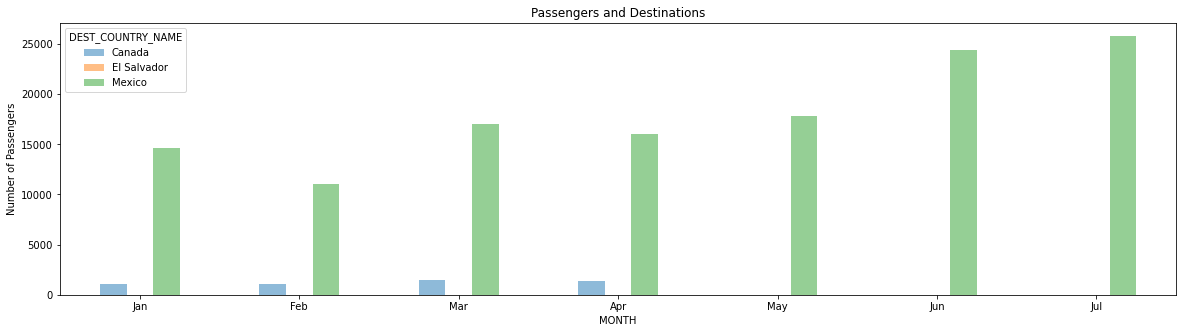

In [52]:
barlabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul']

othercountries19 = saorigin.loc[(saorigin['YEAR']==2019) & (saorigin['MONTH']<8) & (saorigin['DEST_COUNTRY_NAME']!='United States') & (saorigin['PASSENGERS']>0) ,:]
othercountries19
othercountries19grp = othercountries19.groupby(['MONTH','DEST_COUNTRY_NAME'], as_index=False).agg({'PASSENGERS':'sum'})
othercountries19grp


pivot19 = othercountries19grp.pivot(index='MONTH', columns='DEST_COUNTRY_NAME', values='PASSENGERS').fillna(0)
pivot19bar = pivot19.plot.bar(figsize=(20,5), alpha=0.5, align="center", title="Passengers and Destinations")
pivot19bar.set_xticklabels(barlabels, rotation=0)
plt.ylabel("Number of Passengers")

Text(0, 0.5, 'Number of Passengers')

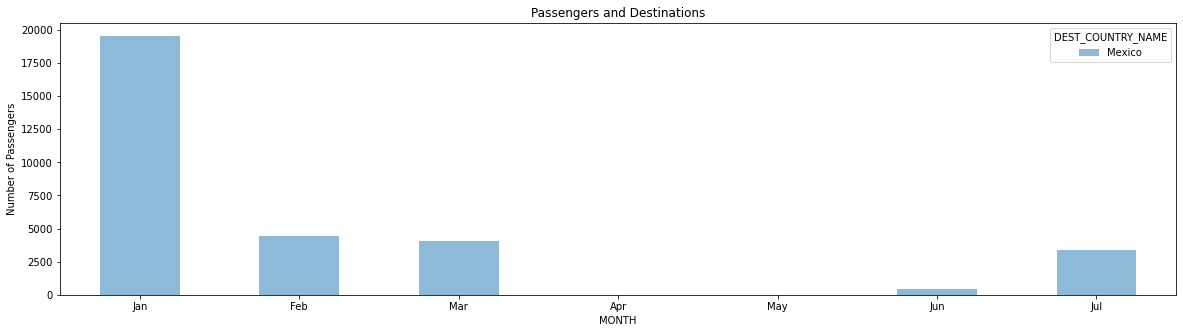

In [71]:
othercountries20 = saorigin.loc[(saorigin['YEAR']==2020) & (saorigin['MONTH']<8) & (saorigin['DEST_COUNTRY_NAME']!='United States') & (saorigin['PASSENGERS']>0) ,:]
othercountries20
othercountries20grp = othercountries20.groupby(['MONTH','DEST_COUNTRY_NAME'], as_index=False).agg({'PASSENGERS':'sum'})
othercountries20grp

# no data for other countries in April and May -- fill with 0
adddata = pd.DataFrame({'MONTH':[4,5],
                           'DEST_COUNTRY_NAME':['Mexico','Mexico'],
                           'PASSENGERS':[0,0]})
other20 = othercountries20grp.append(adddata, ignore_index=True)
sorted20 = other20.sort_values('MONTH').reset_index(drop=True)

pivot20 = sorted20.pivot(index='MONTH', columns='DEST_COUNTRY_NAME', values='PASSENGERS').fillna(0)
pivot20bar = pivot20.plot.bar(figsize=(20,5), alpha=0.5, align="center", title="Passengers and Destinations")
pivot20bar.set_xticklabels(barlabels, rotation=0)
plt.ylabel("Number of Passengers")


In [ ]:
comparison_df = pd.DataFrame({'2019':othercountries19grp,
                '2020': othercountries20grp}, index='MONTH')
# comparison_df ={'2019':othercountries19grp,
#                 '2020': othercountries20grp}

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

### Summary of 2019 Jan - July to 2020 Jan - July (US)

## Flights from Other Places to San Antonio

### Summary of all places (not US and Mexico)

Text(0, 0.5, 'Number of Passengers')

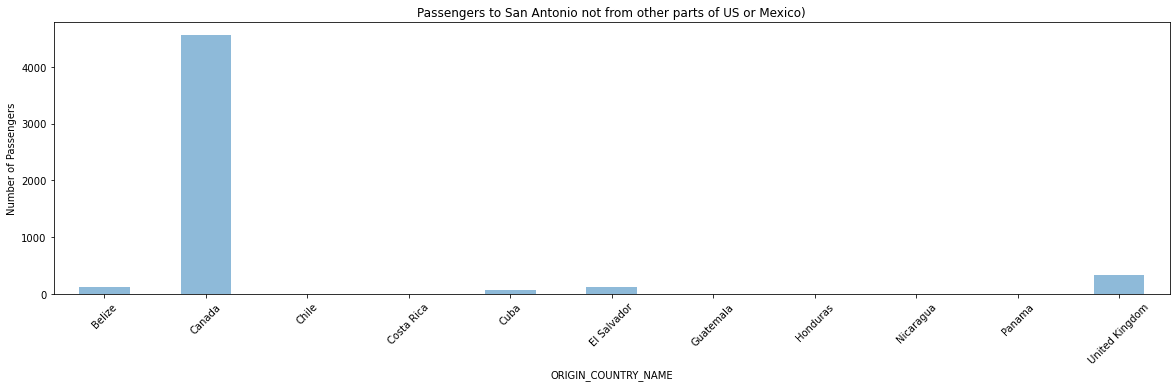

In [21]:
# bar graph of passengers from other countries not US or Mexico

tosanantonio = sadestination.loc[(sadestination['ORIGIN_COUNTRY_NAME']!='United States') & (sadestination['ORIGIN_COUNTRY_NAME']!='Mexico') ,:]

tosanantoniogrp = tosanantonio.groupby('ORIGIN_COUNTRY_NAME').agg({'PASSENGERS':'sum'})

tosanantoniobar = tosanantoniogrp.plot.bar(figsize=(20,5), alpha=0.5, align="center", legend=False, title="Passengers to San Antonio not from other parts of US or Mexico)")
tosanantoniobar.set_xticklabels(tosanantoniogrp.index, rotation=45)
plt.ylabel("Number of Passengers")

### Comparison of 2019 Jan - July to 2020 Jan - July (Not US and Mexico)

### Summary of 2019 Jan - July to 2020 Jan - July (US and Mexico)